In [1]:
from _plotly_future_ import v4_subplots
from plotly.subplots import make_subplots

import itertools

import pandas as pd
pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 1000)
import numpy as np
import scipy as scp
import scipy.stats as ss
import sklearn.metrics as sm

from scipy.integrate import quad
import matplotlib.pyplot as plt

import scipy.special as scps
from statsmodels.graphics.gofplots import qqplot
from scipy.linalg import cholesky
from functools import partial
from scipy.optimize import minimize, brute, fmin
from IPython.display import display
import sympy; sympy.init_printing()
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import pickle 


def display_matrix(m):
    display(sympy.Matrix(m))

In [2]:
pickle_in = open("./data/cleaned_data","rb")
data = pickle.load(pickle_in)
pickle_in.close()

In [58]:
dateidx = '20130515'
data2plot = data.loc[data.date==dateidx,:]
IVidx = -data.loc[data.date == dateidx, 'impl_volatility'].isna()
cpidx = data2plot.cp_flag == 'C'
data2plot = data2plot.loc[cpidx&IVidx,:]

In [486]:
data2plot.head()


with open('datatoAnna', 'wb') as pickleIn:
    pickle.dump(data2plot, pickleIn)

In [61]:
data2plot = data2plot.sort_values(by=['strike_price'])

t2m_mask = np.unique(data2plot.loc[:, 't2m'])

mask = [data2plot.loc[:, 't2m'] == t2m_mask[i] for i in range(len(t2m_mask))]

data2plot1 = [go.Scatter(visible = False,
                     name = str(round(t2m_mask[i] ,4)),
                     mode = 'markers+lines',
                     x = data2plot.loc[m, 'strike_price']/1000, 
                     y = data2plot.loc[m, 'impl_volatility'], 
                     )
                for i,m in enumerate(mask)]

steps = []
for i in range(len(data2plot1)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data2plot1)], 
        label=str(round(t2m_mask[i] ,4))
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 1,
    currentvalue = {"prefix": "Time to Maturity:"},
#     pad = {"t": 50},
    steps = steps
)]

strike_price_toplot = data2plot.loc[:,'Adj Close']
# ymin = np.min(data_toplot.loc[:, 'impl_volatility'])
# ymax = [np.max(data2plot.loc[m, 'impl_volatility']) for m in mask]

layout = dict(sliders=sliders,
              shapes= [go.layout.Shape(
                        type="line",
                        x0=strike_price_toplot.iloc[i],
                        y0=0.05,
                        x1=strike_price_toplot.iloc[i],
                        y1=0.2,
            line=dict(
                color="Black",
                width=1
            )) for i in range(len(mask))])

fig = dict(data=data2plot1, layout=layout)

iplot(fig)

In [69]:
data2plot.strike_price/1000/data2plot.loc[:,'Adj Close']

4289890    0.060285
4289770    0.060285
4290026    0.060285
4289528    0.060285
4289218    0.060285
             ...   
4289570    1.507132
4289572    1.808558
4289939    1.808558
4290076    1.808558
4289436    1.808558
Length: 1529, dtype: float64

In [72]:
data2plot = data2plot.sort_values(by=['strike_price'])

t2m_mask = np.unique(data2plot.loc[:, 't2m'])

mask = [data2plot.loc[:, 't2m'] == t2m_mask[i] for i in range(len(t2m_mask))]

data2plot1 = [go.Scatter(visible = False,
                     name = str(round(t2m_mask[i] ,4)),
                     mode = 'markers+lines',
                     x = data2plot.loc[m, 'strike_price']/1000/data2plot.loc[m,'Adj Close'], 
                     y = data2plot.loc[m, 'impl_volatility'], 
                     )
                for i,m in enumerate(mask)]

steps = []
for i in range(len(data2plot1)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data2plot1)], 
        label=str(round(t2m_mask[i] ,4))
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 1,
    currentvalue = {"prefix": "Time to Maturity:"},
#     pad = {"t": 50},
    steps = steps
)]

strike_price_toplot = 1# data2plot.loc[:,'Adj Close']
# ymin = np.min(data_toplot.loc[:, 'impl_volatility'])
# ymax = [np.max(data2plot.loc[m, 'impl_volatility']) for m in mask]

layout = dict(sliders=sliders,
              shapes= [go.layout.Shape(
                        type="line",
                        x0=strike_price_toplot,#.iloc[i],
                        y0=0.05,
                        x1=strike_price_toplot,#.iloc[i],
                        y1=0.2,
            line=dict(
                color="Black",
                width=1
            )) for i in range(len(mask))])

fig = dict(data=data2plot1, layout=layout)

iplot(fig)

In [83]:
adj_close = data2plot.loc[:,'Adj Close'].iloc[0]

k = np.unique(data2plot.strike_price /1000/ adj_close)

# data2plot.pivot(index='t2m', columns='strike_price', values='impl_volatility')

In [407]:

test = data2plot.pivot(index='t2m', columns='strike_price', values='impl_volatility')
# test = test2
test.columns = k
test

,0.060285,0.090428,0.120571,0.150713,0.180856,0.210998,0.241141,0.271284,0.301426,0.331569,0.361712,0.391854,0.421997,0.437068,0.452140,0.467211,0.482282,0.497353,0.512425,0.527496,0.542567,0.557639,0.572710,0.587781,0.590796,0.602853,0.608881,0.614910,0.617924,0.620938,0.626967,0.629981,0.632995,0.636010,0.639024,0.642038,0.645052,0.648067,0.651081,0.654095,0.657109,0.660124,0.663138,0.666152,0.669166,0.672181,0.675195,0.678209,0.681224,0.684238,0.687252,0.690266,0.693281,0.696295,0.699309,0.702323,0.705338,0.708352,0.711366,0.714380,0.717395,0.720409,0.723423,0.726437,0.729452,0.732466,0.735480,0.738495,0.741509,0.744523,0.747537,0.750552,0.753566,0.756580,0.759594,0.762609,0.765623,0.768637,0.771651,0.774666,0.777680,0.780694,0.783708,0.786723,0.789737,0.792751,0.795766,0.798780,0.801794,0.804808,0.807823,0.810837,0.813851,0.816865,0.819880,0.822894,0.825908,0.828922,0.831937,0.834951,0.837965,0.840980,0.843994,0.847008,0.850022,0.853037,0.856051,0.859065,0.862079,0.865094,0.868108,0.871122,0.874136,0.877151,0.880165,0.883179,0.886193,0.889208,0.892222,0.895236,0.898251,0.901265,0.904279,0.907293,0.910308,0.913322,0.916336,0.919350,0.922365,0.925379,0.928393,0.931407,0.934422,0.937436,0.940450,0.943464,0.946479,0.949493,0.952507,0.955522,0.958536,0.961550,0.964564,0.967579,0.970593,0.973607,0.976621,0.979636,0.982650,0.985664,0.988678,0.991693,0.994707,0.997721,1.000735,1.003750,1.006764,1.009778,1.012793,1.015807,1.018821,1.021835,1.024850,1.027864,1.030878,1.033892,1.036907,1.039921,1.042935,1.045949,1.048964,1.051978,1.054992,1.058006,1.061021,1.064035,1.067049,1.070064,1.073078,1.076092,1.079106,1.082121,1.085135,1.091163,1.100206,1.115277,1.130349,1.145420,1.160491,1.175563,1.190634,1.205705,1.220777,1.235848,1.265991,1.326276,1.356419,1.507132,1.808558
t2m,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.008219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233895,0.261115,0.259106,0.249047,0.243135,0.236212,0.226510,0.216688,0.209295,0.201980,0.181489,0.175650,0.159595,0.151693,0.152183,0.157970,0.171630,0.175873,0.182105,0.193822,0.216192,0.238202,0.250302,0.258152,0.277919,0.297478,0.294465,0.312542,0.330468,0.348250,0.365897,NaN,0.400806,NaN,NaN,0.452287,NaN,NaN,NaN,NaN,0.535990,NaN,NaN,0.696720,NaN,0.849984,NaN,NaN,NaN,1.138252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.024658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547375,NaN,0.531044,NaN,0.514823,0.506753,0.498710,NaN,0.482703,NaN,0.466798,NaN,0.450994,NaN,0.468011,0.459778,0.451566,NaN,0.435206,NaN,0.418928,0.410805,0.402716,0.394646,0.386594,0.378560,0.388199,0.379907,0.384688,0.376199,0.338646,0.330711,0.322790,0.314883,0.306990,0.299109,0.317132,0.308736,0.300347,0.291966,0.283591,0.283535,0.281993,0.273264,0.264534,0.261587,0.257808,0.248778,0.244182,0.239017,0.233358,0.227262,0.220771,0.216635,0.222762,0.203840,0.199782,0.192969,0.187296,0.180862,0.181553,0.170827,0.165309,0.159644,0.157941,0.153397,0.147193,0.143285,0.137866,0.133667,0.130119,0.125777,0.122893,0.119656,0.116956,0.115476,0.114474,0.113838,0.113992,NaN,0.1

In [408]:
test.index

Float64Index([ 0.00821917808219178, 0.024657534246575342, 0.043835616438356165,
               0.06301369863013699,   0.0821917808219178,  0.10410958904109589,
               0.12054794520547946,  0.18082191780821918,  0.25753424657534246,
               0.35342465753424657,   0.3780821917808219,   0.6027397260273972,
                0.6301369863013698,   0.6794520547945205,    0.852054794520548,
                0.8767123287671232,   1.1013698630136985,                  1.6,
                2.5972602739726027],
             dtype='float64', name='t2m')

In [409]:
print('strikes:',np.nanmin(test.columns), np.nanmax(test.columns))
print('t2m:',np.nanmin(test.index), np.nanmax(test.index))
print('impl_vol:',np.nanmin(test.values), np.nanmax(test.values))

strikes: 0.06028526884320236 1.8085580652960707
t2m: 0.00821917808219178 2.5972602739726027
impl_vol: 0.10628199999999999 2.646613


In [483]:
layout = dict(scene = dict(
        xaxis = dict(nticks=4, range=[0,3], title='time to maturity'),
        yaxis = dict(nticks=4, range=[0,2], title='strike'),
        zaxis = dict(nticks=4, range=[0,3], title='Implied Volatility')))

fig = go.Figure(data=[go.Surface(x=test.index,
                                 y=test.columns,
                                 z=test.values)], layout=layout)
plot(fig)

'temp-plot.html'

In [445]:
test.iloc[0:2,110:112]

,0.868108,0.871122
t2m,,
0.008219,NaN,NaN
0.024658,0.384688,0.376199


In [477]:
pickle_out = open("mktIV_datatoplot","wb")
pickle.dump(test3, pickle_out)
pickle_out.close()
# test3

In [471]:
test3 = test.iloc[:, 130:-7]
layout = dict(scene = dict(
        xaxis = dict(title='time to maturity',),
        yaxis = dict(title='strike',),
        zaxis = dict(title='Implied Volatility',)))

fig = go.Figure(data=[go.Surface(x=test3.index,
                                 y=test3.columns,
                                 z=test3.values)], layout=layout)
fig.layout.title = 'Market Implied Vol of SP500 in 20130515'
# iplot(fig)
plot(fig, filename='mktIV_20130515_SPX.html')

'mktIV_20130515_SPX.html'

In [482]:
with open("mktIV_datatoplot","rb") as pickle_in:
    ijij = pickle.load(pickle_in)
ijij

,0.928393,0.931407,0.934422,0.937436,0.940450,0.943464,0.946479,0.949493,0.952507,0.955522,0.958536,0.961550,0.964564,0.967579,0.970593,0.973607,0.976621,0.979636,0.982650,0.985664,0.988678,0.991693,0.994707,0.997721,1.000735,1.003750,1.006764,1.009778,1.012793,1.015807,1.018821,1.021835,1.024850,1.027864,1.030878,1.033892,1.036907,1.039921,1.042935,1.045949,1.048964,1.051978,1.054992,1.058006,1.061021,1.064035,1.067049,1.070064,1.073078,1.076092,1.079106,1.082121,1.085135,1.091163,1.100206,1.115277,1.130349,1.145420,1.160491,1.175563,1.190634,1.205705
t2m,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.008219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233895,0.261115,0.259106,0.249047,0.243135,0.236212,0.226510,0.216688,0.209295,0.201980,0.181489,0.175650,0.159595,0.151693,0.152183,0.157970,0.171630,0.175873,0.182105,0.193822,0.216192,0.238202,0.250302,0.258152,0.277919,0.297478,0.294465,0.312542,0.330468,0.348250,0.365897,NaN,0.400806,NaN,NaN,0.452287,NaN,NaN,NaN,NaN,0.535990,NaN,NaN,0.696720,NaN,0.849984,NaN,NaN,NaN,1.138252
0.024658,0.244182,0.239017,0.233358,0.227262,0.220771,0.216635,0.222762,0.203840,0.199782,0.192969,0.187296,0.180862,0.181553,0.170827,0.165309,0.159644,0.157941,0.153397,0.147193,0.143285,0.137866,0.133667,0.130119,0.125777,0.122893,0.119656,0.116956,0.115476,0.114474,0.113838,0.113992,NaN,0.115651,NaN,NaN,NaN,NaN,0.134809,NaN,NaN,NaN,NaN,0.151122,NaN,NaN,NaN,NaN,0.171986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.043836,0.207883,0.202048,0.197645,0.192911,0.189221,0.186285,0.179305,0.176537,0.172093,0.167173,0.163494,0.158379,0.154208,0.151999,0.148162,0.145726,0.142715,0.138631,0.133983,0.130862,0.126835,0.123814,0.121528,0.118290,0.115478,0.112963,0.111062,0.108989,0.107624,0.107261,0.106789,0.106749,0.107318,0.107917,0.109458,0.111118,0.113313,0.115860,0.118302,0.121841,0.124823,NaN,0.131630,NaN,NaN,NaN,NaN,0.145699,NaN,NaN,NaN,NaN,0.160364,NaN,0.171202,0.192789,NaN,NaN,NaN,NaN,NaN,NaN
0.063014,0.184379,0.180068,0.178653,0.173792,0.170564,0.166959,0.163785,0.160187,0.156874,0.154365,0.151272,0.149805,0.146556,0.143671,0.141891,0.138460,0.133956,0.132188,0.129476,0.126880,0.124294,0.121628,0.119419,0.116943,0.114744,0.112754,0.110932,0.109598,0.108121,0.107258,0.106411,0.106585,0.106282,0.106330,0.107069,0.107933,0.109182,0.110729,0.112371,0.113732,0.116187,0.118090,0.121805,NaN,NaN,NaN,NaN,0.132858,NaN,NaN,NaN,NaN,0.139328,NaN,0.162389,0.175410,NaN,NaN,NaN,NaN,NaN,NaN
0.082192,0.178826,NaN,0.172267,NaN,0.165994,NaN,0.160820,0.157666,0.154659,NaN,0.148408,NaN,0.143364,NaN,0.138821,NaN,0.133927,0.130855,0.128642,NaN,0.123989,NaN,0.119399,NaN,0.115479,NaN,0.112122,0.110772,0.109461,NaN,0.107708,NaN,0.106852,NaN,0.106788,NaN,0.107445,0.107775,0.108905,NaN,0.111394,NaN,0.114173,NaN,NaN,NaN,NaN,0.125453,NaN,NaN,NaN,NaN,0.133094,NaN,0.144224,0.156393,NaN,NaN,NaN,NaN,NaN,NaN
0.104110,0.176591,0.173499,0.170193,0.167190,0.164910,0.161389,0.158524,0.154528,0.153514,0.150868,0.148222,0.145544,0.143130,0.140596,0.138219,0.137097,0.133992,0.132294,0.130003,0.127635,0.125402,0.123252,0.121140,0.117817,0.117344,0.115835,0.113984,0.112509,0.111170,0.109435,0.107825,0.107593,0.107429,0.106710,0.106876,0.107010,0.107186,0.109461,0.107847,0.109208,0.109358,0.110561,0.112042,0.113066,0.114548,0.116699,0.117402,0.118877,0.121428,0.12228,0.125236,0.127223,0.129960,NaN,0.139589,0.149587,NaN,0.173140,NaN,0.201630,NaN,0.228947
0.120548,0.173092,0.170649,0.167973,0.165491,0.162761,0.160558,0.158063,0.155639,0.153254,0.150880,0.148181,0.146056,0.143844,0.141799,0.141195,0.139055,0.136978,0.134447,0.132404,0.130095,0.128181,0.126613,0.124465,0.122826,0.121003,0.119415,0.117373,0.115755,0.114336,0.112886,0.111907,0.110413,0.110020,0.109170,0.109084,0.108954,0.108824,0.109552,0.109699,0.110110,0.110416,0.110654,0.111502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124857,NaN,NaN,0.141923,NaN,NaN,NaN,NaN,NaN,NaN
0.180822,0.172411,0.171304,0.167963,0.166992,0.164693,0.161434,0.160295,0.158402,0.1550

In [98]:
data2plot.volume > 0

ITM = (data2plot.strike_price/adj_close/1000 > 0.8) & data2plot.strike_price/adj_close/1000 <1.2

In [107]:
test2 = data2plot.loc[ITM & (data2plot.volume > 100),:]
test2

,date,cp_flag,strike_price,best_bid,best_offer,volume,impl_volatility,t2m,Adj Close,riskfree_mo,term,yield,dt
4288684,20130515,C,1300000,354.20,356.80,4000,0.309394,0.180822,1658.780029,3,BC_3MONTH,0.04,2013-05-15
4288332,20130515,C,1350000,305.30,307.90,4002,0.313334,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4289029,20130515,C,1400000,254.70,257.80,4000,0.224430,0.257534,1658.780029,3,BC_3MONTH,0.04,2013-05-15
4288352,20130515,C,1450000,206.00,208.70,8013,0.237727,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288363,20130515,C,1500000,156.80,159.60,103,0.202298,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288732,20130515,C,1540000,121.70,124.60,120,0.172411,0.180822,1658.780029,3,BC_3MONTH,0.04,2013-05-15
4288373,20130515,C,1550000,108.70,111.50,4154,0.170193,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288379,20130515,C,1580000,81.10,83.90,122,0.153514,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288381,20130515,C,1590000,72.30,75.00,194,0.148222,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288383,20130515,C,1600000,63.80,66.30,21292,0.143130,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15


Text(0.5, 0.92, 'Market IV')

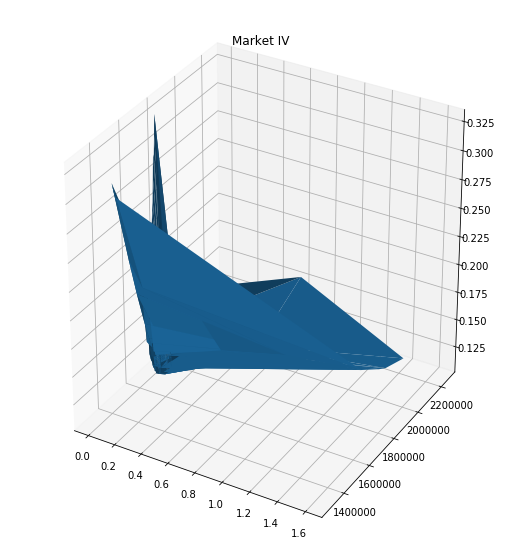

In [111]:
fig = plt.figure(figsize=(20,10))
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(test2['t2m'], 
                 test2['strike_price'], 
                 test2['impl_volatility'])
ax2.set_title('Market IV')

In [114]:
test2.pivot(index='t2m', columns='strike_price', values='impl_volatility')

strike_price,1300000,1350000,1400000,1450000,1500000,1540000,1550000,1580000,1590000,1600000,1610000,1615000,1620000,1625000,1630000,1635000,1640000,1645000,1650000,1655000,1660000,1665000,1670000,1675000,1680000,1685000,1690000,1695000,1700000,1705000,1710000,1715000,1720000,1725000,1730000,1735000,1740000,1745000,1750000,1760000,1765000,1775000,1800000,1825000,1850000,1900000,2000000,2250000
t2m,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.008219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233895,0.259106,0.249047,0.243135,0.236212,0.226510,0.216688,0.209295,0.201980,0.181489,0.175650,0.159595,0.151693,0.152183,0.157970,0.171630,0.175873,0.182105,0.193822,0.216192,0.238202,0.250302,0.258152,0.277919,0.297478,0.294465,0.312542,0.330468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.024658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153397,NaN,0.143285,0.137866,0.133667,0.130119,0.125777,0.122893,0.119656,0.116956,0.115476,0.114474,0.113838,0.113992,NaN,0.115651,NaN,NaN,NaN,NaN,0.134809,NaN,NaN,NaN,NaN,0.151122,NaN,NaN,0.171986,NaN,NaN,NaN,NaN,NaN,NaN
0.043836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138631,0.133983,0.130862,0.126835,0.123814,0.121528,0.118290,0.115478,0.112963,0.111062,0.108989,0.107624,NaN,NaN,NaN,0.107318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131630,NaN,NaN,0.145699,NaN,NaN,NaN,NaN,NaN,NaN
0.063014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146556,NaN,NaN,NaN,NaN,0.129476,NaN,NaN,NaN,0.119419,0.116943,0.114744,0.112754,NaN,0.109598,0.108121,0.107258,NaN,NaN,0.106282,NaN,0.107069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121805,NaN,NaN,0.132858,NaN,NaN,NaN,NaN,NaN,NaN
0.082192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.104110,NaN,0.313334,NaN,0.237727,0.202298,NaN,0.170193,0.153514,0.148222,0.143130,0.138219,NaN,0.133992,0.132294,0.130003,0.127635,0.125402,0.123252,0.121140,0.117817,0.117344,0.115835,0.113984,0.112509,0.111170,0.109435,0.107825,0.107593,0.107429,0.106710,0.106876,0.107010,0.107186,0.109461,0.107847,0.109208,0.109358,NaN,0.112042,0.114548,0.116699,0.118877,NaN,0.139589,NaN,NaN,NaN,NaN
0.120548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.134447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115755,NaN,NaN,NaN,NaN,0.110020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.180822,0.309394,NaN,NaN,NaN,NaN,0.172411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.139784,0.137798,0.136040,0.134302,NaN,0.131008,NaN,NaN,0.125936,0.124560,0.123114,NaN,0.119964,0.118829,NaN,0.117138,NaN,0.114512,NaN,0.113027,0.112939,NaN,NaN,0.112220,0.112451,0.112996,NaN,NaN,0.114924,0.117900,NaN,NaN,NaN,NaN,NaN
0.257534,NaN,NaN,0.22443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137985,0.136591,0.135239,NaN,NaN,NaN,0.130273,NaN,NaN,NaN,NaN,0.124707,NaN,0.122876,NaN,0.121152,0.120059,NaN,NaN,NaN,NaN,0.118470,NaN,NaN,NaN,0.119804,NaN,NaN,NaN,NaN,NaN


In [119]:
test2

,date,cp_flag,strike_price,best_bid,best_offer,volume,impl_volatility,t2m,Adj Close,riskfree_mo,term,yield,dt
4288684,20130515,C,1300000,354.20,356.80,4000,0.309394,0.180822,1658.780029,3,BC_3MONTH,0.04,2013-05-15
4288332,20130515,C,1350000,305.30,307.90,4002,0.313334,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4289029,20130515,C,1400000,254.70,257.80,4000,0.224430,0.257534,1658.780029,3,BC_3MONTH,0.04,2013-05-15
4288352,20130515,C,1450000,206.00,208.70,8013,0.237727,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288363,20130515,C,1500000,156.80,159.60,103,0.202298,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288732,20130515,C,1540000,121.70,124.60,120,0.172411,0.180822,1658.780029,3,BC_3MONTH,0.04,2013-05-15
4288373,20130515,C,1550000,108.70,111.50,4154,0.170193,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288379,20130515,C,1580000,81.10,83.90,122,0.153514,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288381,20130515,C,1590000,72.30,75.00,194,0.148222,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288383,20130515,C,1600000,63.80,66.30,21292,0.143130,0.104110,1658.780029,1,BC_1MONTH,0.01,2013-05-15


In [120]:
def cf_Heston_schoutens(u, S0, t, mu, v0, kappa, theta, rho, sigma):
    """
    Heston characteristic function as proposed by Schoutens (2004)
    """
    phi = kappa - sigma*rho*u*1j
    d  = np.sqrt( ((-phi)**2) - ((sigma**2) * (-1j*u - u**2 )) )
    g  = (phi-d)/(phi+d)
    
    cf = np.exp((1j*u)*(np.log(S0)+mu*t)) * \
         np.exp((kappa*theta)/(sigma**2) * ( (phi-d)*t - 2*np.log( (1-g*np.exp(-d*t))/(1-g) ))) *\
         np.exp((v0/sigma**2)*(phi-d) * (1-np.exp(-d*t))/(1-g*np.exp(-d*t)) )
    return cf

def xi(u, alpha, S0, t, mu, v0, kappa, theta, rho, sigma):
    
    cf = cf_Heston_schoutens(u - (alpha+1)*1j,
                             S0, t, mu, v0, kappa, theta, rho, sigma)
    numerator = np.exp(-mu*t)*cf
    denominator = alpha**2 + alpha - u**2 + 1j*(2*alpha+1)*u
    return numerator/denominator

def call_price(alpha, S0, K, t, mu, par):
    v0, kappa, theta, rho, sigma = par
    multiplier = np.exp(-alpha*np.log(K))/np.pi
    integrand = lambda u: (np.exp(-1j*u*np.log(K)))*xi(u, alpha, S0, t, mu, v0, kappa, theta, rho, sigma)
    return multiplier * quad(integrand, limit=10000, a=0, b=np.inf)[0] 

In [122]:
v0 = 0.013681                                        # spot variance
rho = -0.620100                                      # correlation coefficient
kappa = 1.605179                                     # mean reversion coefficient
theta = 0.053318                                     # long-term mean of the variance
sigma = 0.590506                                     # (Vol of Vol) - Volatility of instantaneous variance

mu = 0.00                                         # drift
t = T = 1/12                                             # Time to mat
r = 0.00                                          # risk-free rate
K = 1                                            # Stike  
S0 = 1                                          # spot stock price 

alpha = 0.75
par = v0, kappa, theta, rho, sigma

call_price(alpha, S0, K, t, mu, par)

In [178]:
K = 1685
t = 0.063014
S0 = 1658.78
mu = 0.01
#14.30	14.80
call_price(alpha, S0, K, t, mu, par)

$
C = S_tN(d_1)-K\operatorname{e}^{-rt}N(d_2)
$

where

$ d_1 = \frac{\operatorname{ln}\frac{S_t}{K} + (r+\frac{\sigma_{BS}}{2})t}{\sqrt{\sigma_{BS}t}} \\
d_2= d_1 - \sqrt{\sigma_{BS}t}
$

In [228]:
from scipy.stats import norm

def Nd1(S0, K, mu, sigma_BS):
    n = np.log(S0/K) + (mu+(sigma_BS/2))*t
    d = np.sqrt(sigma_BS*t)
    return norm.cdf(n/d, 0, 1)

def Nd2(S0, K, mu, sigma_BS):
    n = np.log(S0/K) + (mu+(sigma_BS/2))*t
    d = np.sqrt(sigma_BS*t)
    return norm.cdf(n/d - np.sqrt(sigma*t), 0,1)

sigma_BS = 0.107258
BSprice = S0*Nd1(S0,K,mu,sigma_BS) -\
          K*np.exp(-mu*t)*Nd2(S0,K,mu,sigma_BS)
print(BSprice)

0.0001306596615271438


In [302]:
test2.iloc[105,:]

date                          20130515
cp_flag                              C
strike_price                   1690000
best_bid                          17.5
best_offer                        18.5
volume                            1929
impl_volatility               0.118829
t2m                           0.180822
Adj Close                      1658.78
riskfree_mo                          3
term                         BC_3MONTH
yield                             0.04
dt                 2013-05-15 00:00:00
Name: 4288762, dtype: object

In [301]:
def call_price_BS(S0, K, T, mu, sigma_BS):
    d1 = (np.log(S0 / K) + (mu + 0.5 * sigma_BS ** 2) * T) / (sigma_BS * np.sqrt(T))
    d2 = (np.log(S0 / K) + (mu - 0.5 * sigma_BS ** 2) * T) / (sigma_BS * np.sqrt(T))
    call = (S0 * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-mu * T) * norm.cdf(d2, 0.0, 1.0))
    return call

In [491]:
call_price_BS(78.0517, 80, 1, 0.07, 0.25)

In [492]:
def delta_C(S0, K, T, mu, sigma_BS):
    d1 = (np.log(S0 / K) + (mu + 0.5 * sigma_BS ** 2) * T) / (sigma_BS * np.sqrt(T))
    return norm.cdf(d1, 0.0, 1.0)

In [495]:
delta1 = delta_C(220, 220, 0.25, 0.06, 0.25)
delta2 = delta_C(220, 220, 0.50, 0.06, 0.25)
print(delta1, delta2,delta1-delta2)

0.5724048228209871 0.6018328093735789 -0.02942798655259171


In [504]:
def gamma_C(S0, K, T, mu, sigma_BS):
    d1 = (np.log(S0 / K) + (mu + 0.5 * sigma_BS ** 2) * T) / (sigma_BS * np.sqrt(T))
    return (1/(sigma_BS*S0*np.sqrt(T)))*norm.pdf(d1, 0.0, 1.0)

In [509]:
gamma_C(220, 220, 0.25, 0.06, 0.25)
gamma_C(220, 220, 0.50, 0.06, 0.25)

In [519]:
def theta_C(S0, K, T, mu, sigma_BS):
    d1 = (np.log(S0 / K) + (mu + 0.5 * sigma_BS ** 2) * T) / (sigma_BS * np.sqrt(T))
    d2 = d1 - sigma_BS*np.sqrt(T)
    return -sigma_BS*S0/(2*np.sqrt(T))*norm.pdf(d1) \
           -mu*K*np.exp(-mu*T)*norm.cdf(d2)

In [521]:
# theta_C(220, 220, 0.25, 0.06, 0.25)
theta_C(220, 220, 0.50, 0.06, 0.25)

In [522]:
call_price_BS(100, 100, 4, 0.03, 0.1)

In [528]:
call_price_BS(100, 100, 4/12, (1.03**12)-1, 0.1*(12**0.5))

In [525]:
(1.03**12) - 1

In [536]:
new_delta = delta_C(1.01,1,4,0.03,.1)
old_delta = delta_C(1.00,1,4,0.03,.1)
print(new_delta, old_delta,(new_delta-old_delta)*100000)

0.7732978544619845 0.758036347776927 1526.1506685057545


In [538]:
0.5 + 0.5*(0.06-0.5*(0.25**2))*np.sqrt(.5)/.25

In [540]:
(0.25**2)*0.5 / np.log(1.19**2)**2

In [547]:
0.5*(120-84.72)*np.exp(-0.06*0.5)

In [549]:
17.34*np.exp(-0.06*0.5)*0.5

In [330]:
input_ = test2.iloc[105,:] #.loc[4288383,:]
input_

date                          20130515
cp_flag                              C
strike_price                   1690000
best_bid                          17.5
best_offer                        18.5
volume                            1929
impl_volatility               0.118829
t2m                           0.180822
Adj Close                      1658.78
riskfree_mo                          3
term                         BC_3MONTH
yield                             0.04
dt                 2013-05-15 00:00:00
Name: 4288762, dtype: object

In [343]:
S0 = input_['Adj Close']
K = input_.strike_price/1000
T = input_.t2m
mu = input_['yield']
sigma_BS = input_.impl_volatility*.788
call_price_BS(S0, K, T, mu, sigma_BS)

In [332]:
input_.impl_volatility

In [215]:
S=S0
r=mu
sigma=sigma_BS
T=T

d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d1

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in double_scalars

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning:

invalid value encountered in double_scalars



In [245]:
def euro_vanilla_call(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    print(norm.cdf(d1, 0.0, 1.0))
    print(norm.cdf(d2, 0.0, 1.0))
    call = (S * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0))
    
    return call

In [249]:
euro_vanilla_call(S=1, K=1, T=0.00001, r=0, sigma=sigma_BS)

0.5000676565366874
0.4999323434633126
